### Running the inference
We can run inference on the new data in GeoTIFF format. The data can be of any shape (e.g. height and width) as long as it follows the bands/channels of the original dataset. An example is shown below.
```cmd
python model_inference.py -config /path/to/config/config.py -ckpt /path/to/checkpoint/checkpoint.pth -input /input/folder/ -output /output/folder/ -input_type tif -bands "[0,1,2,3,4,5]"
```
* In our case, `python model_inference.py -config /home/jovyan/hls-foundation-os/configs/sen1floods11_config.py -ckpt /home/jovyan/finetuned-models/best_mIoU_epoch_100.pth -input /home/jovyan/flood/input/ -output /home/jovyan/flood/out/ -input_type tif`


### Result Visualization

In [20]:
import os,glob
import rasterio
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib
from rasterio.plot import show
import numpy as np
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [21]:
def img_preprocess(src):
    # Read the selected bands
    red = src.read(RED)
    green = src.read(GREEN)
    blue = src.read(BLUE)
    
    # Normalize the values to [0, 255]
    red = 255 * (red / np.max(red))
    green = 255 * (green / np.max(green))
    blue = 255 * (blue / np.max(blue))
    
    # Stack the bands to create a RGB image
    rgb_image = np.stack((red, green, blue), axis=-1)
    return rgb_image.astype('uint8')

In [58]:
flood_origin_path = "flood/input/"
flood_result_path = "flood/out/"

input_lst = glob.glob(os.path.join(flood_origin_path,"*.tif"))
out_lst = glob.glob(os.path.join(flood_result_path,"*.tif"))

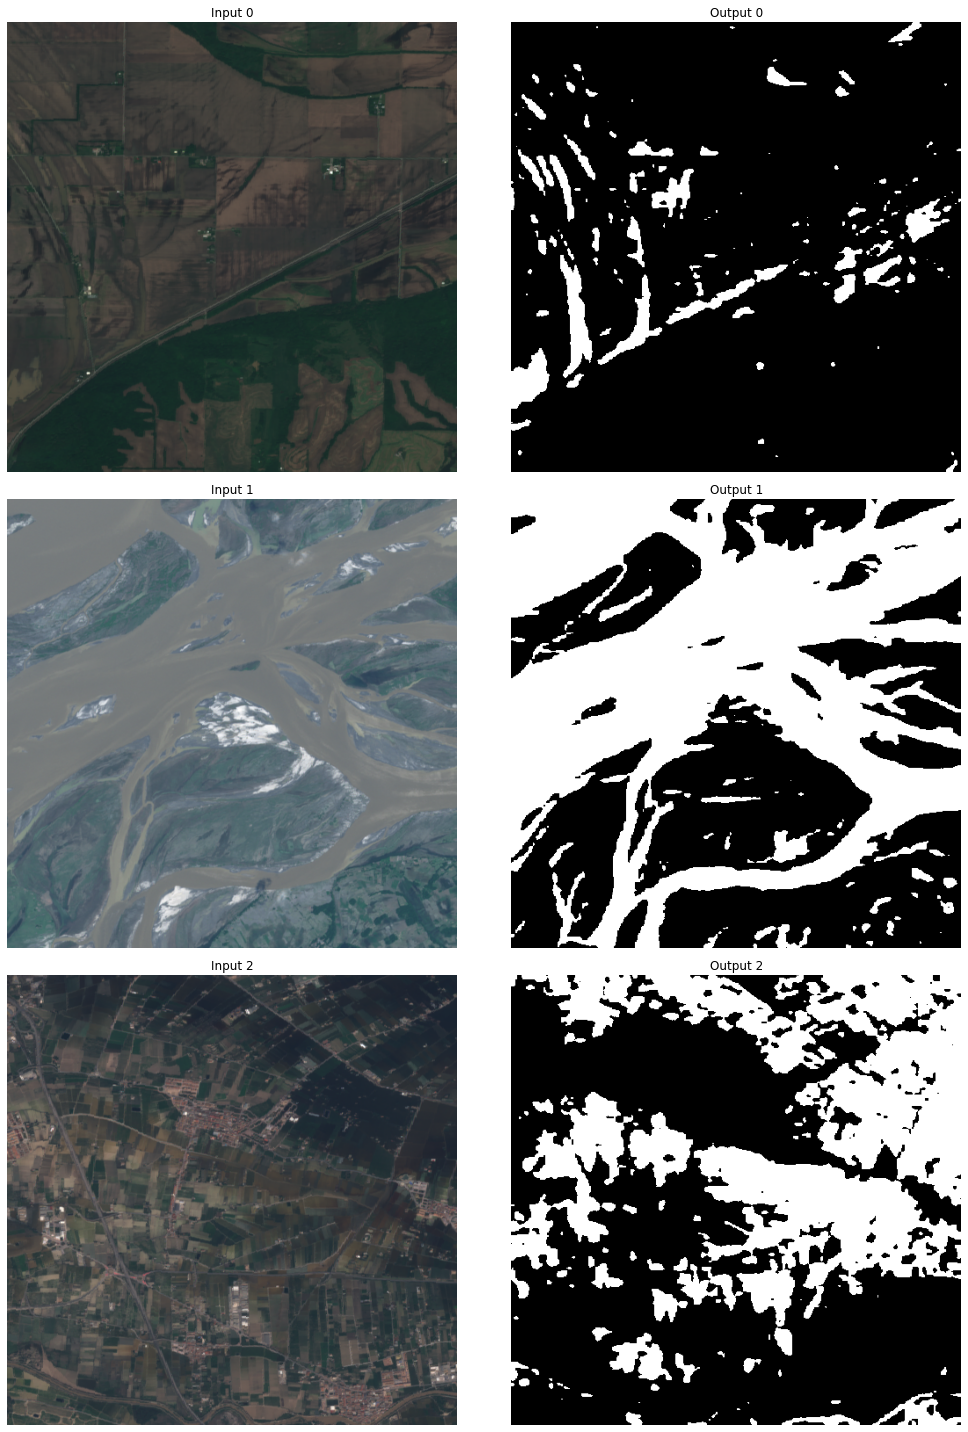

In [60]:
# Assuming you have lists input_lst and out_lst containing file paths
RED = 4  # Replace with the appropriate band index for the red channel
GREEN = 3  # Replace with the appropriate band index for the green channel
BLUE = 2  # Replace with the appropriate band index for the blue channel


num_rows = len(input_lst)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for row in range(num_rows):
    idx = row 
    if idx < len(input_lst):
        src_in = img_preprocess(rasterio.open(input_lst[idx]))
        axs[row, 0].imshow(src_in)
        axs[row, 0].axis('off')
        axs[row, 0].set_title(f'Input {idx}')

        src_out = rasterio.open(out_lst[idx])
        axs[row, 1].imshow(src_out.read(1), cmap='gray')  # Assuming single-band output
        axs[row, 1].axis('off')
        axs[row, 1].set_title(f'Output {idx}')

plt.tight_layout()
plt.show()

In [64]:
# # Choose the bands for the RGB channels (assuming 0-indexed bands)
RED = 5  # Replace with the appropriate band index for the red channel
GREEN = 4  # Replace with the appropriate band index for the green channel
BLUE = 3  # Replace with the appropriate band index for the blue channel


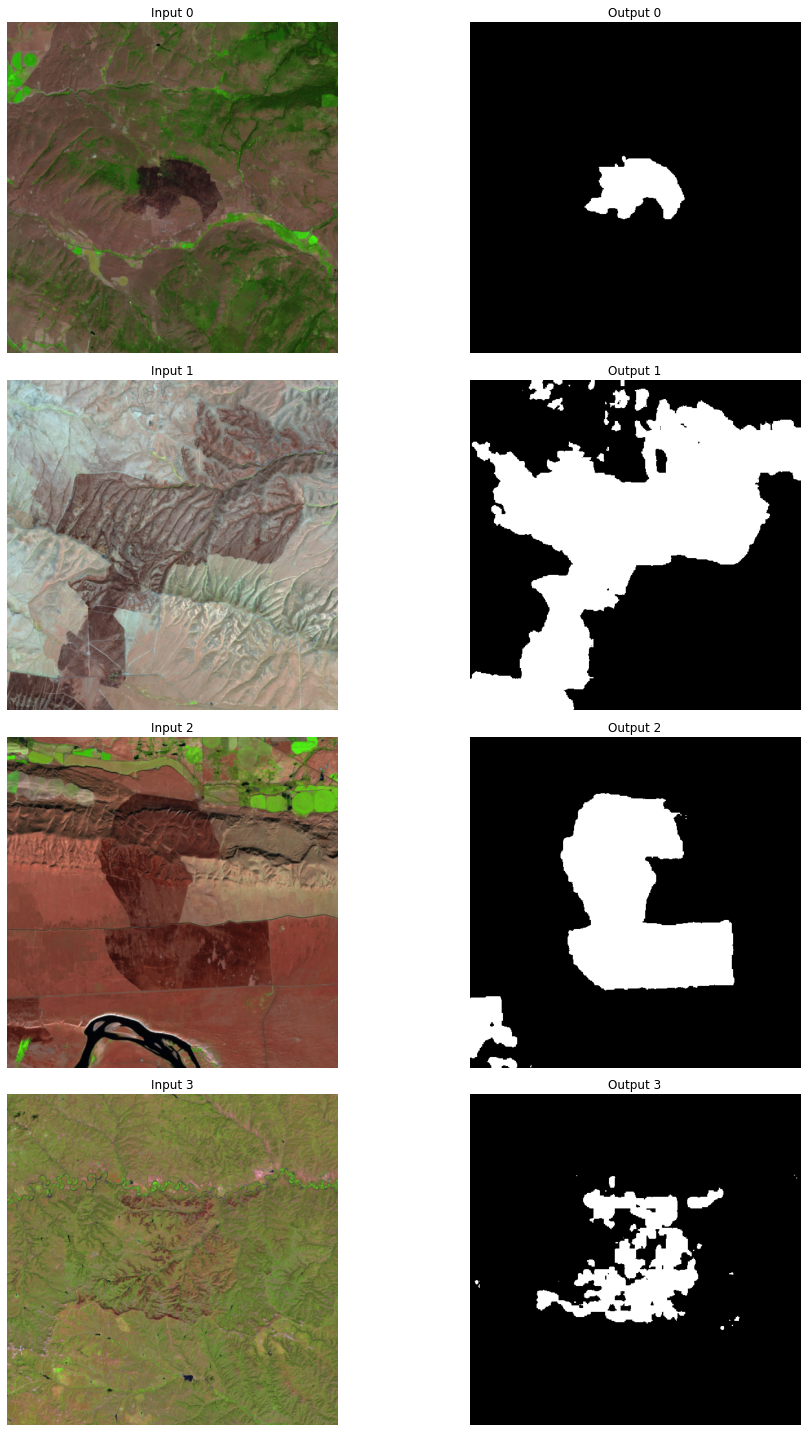

In [65]:
burn_origin_path = "burn/input/"
burn_result_path = "burn/out/"

input_lst = glob.glob(os.path.join(burn_origin_path,"*.tif"))
out_lst = glob.glob(os.path.join(burn_result_path,"*.tif"))

myorder = [1,2,3,0]
out_lst = [out_lst[i] for i in myorder]

# src_in = img_preprocess(rasterio.open(input_lst[0]))
# plt.imshow(src_in)
# plt.show()

num_rows = len(input_lst)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for row in range(num_rows):
    idx = row 
    if idx < len(input_lst):
        src_in = img_preprocess(rasterio.open(input_lst[idx]))
        axs[row, 0].imshow(src_in)
        axs[row, 0].axis('off')
        axs[row, 0].set_title(f'Input {idx}')

        src_out = rasterio.open(out_lst[idx])
        axs[row, 1].imshow(src_out.read(1), cmap='gray')  # Assuming single-band output
        axs[row, 1].axis('off')
        axs[row, 1].set_title(f'Output {idx}')

plt.tight_layout()
plt.show()

```python
python model_inference.py -config /home/jovyan/hls-foundation-os/configs/built_area_config.py -ckpt /home/jovyan/hls-foundation-os/built_area_model.pth -input /home/jovyan/flood/input/ -output /home/jovyan/built_out/ -input_type tif
```

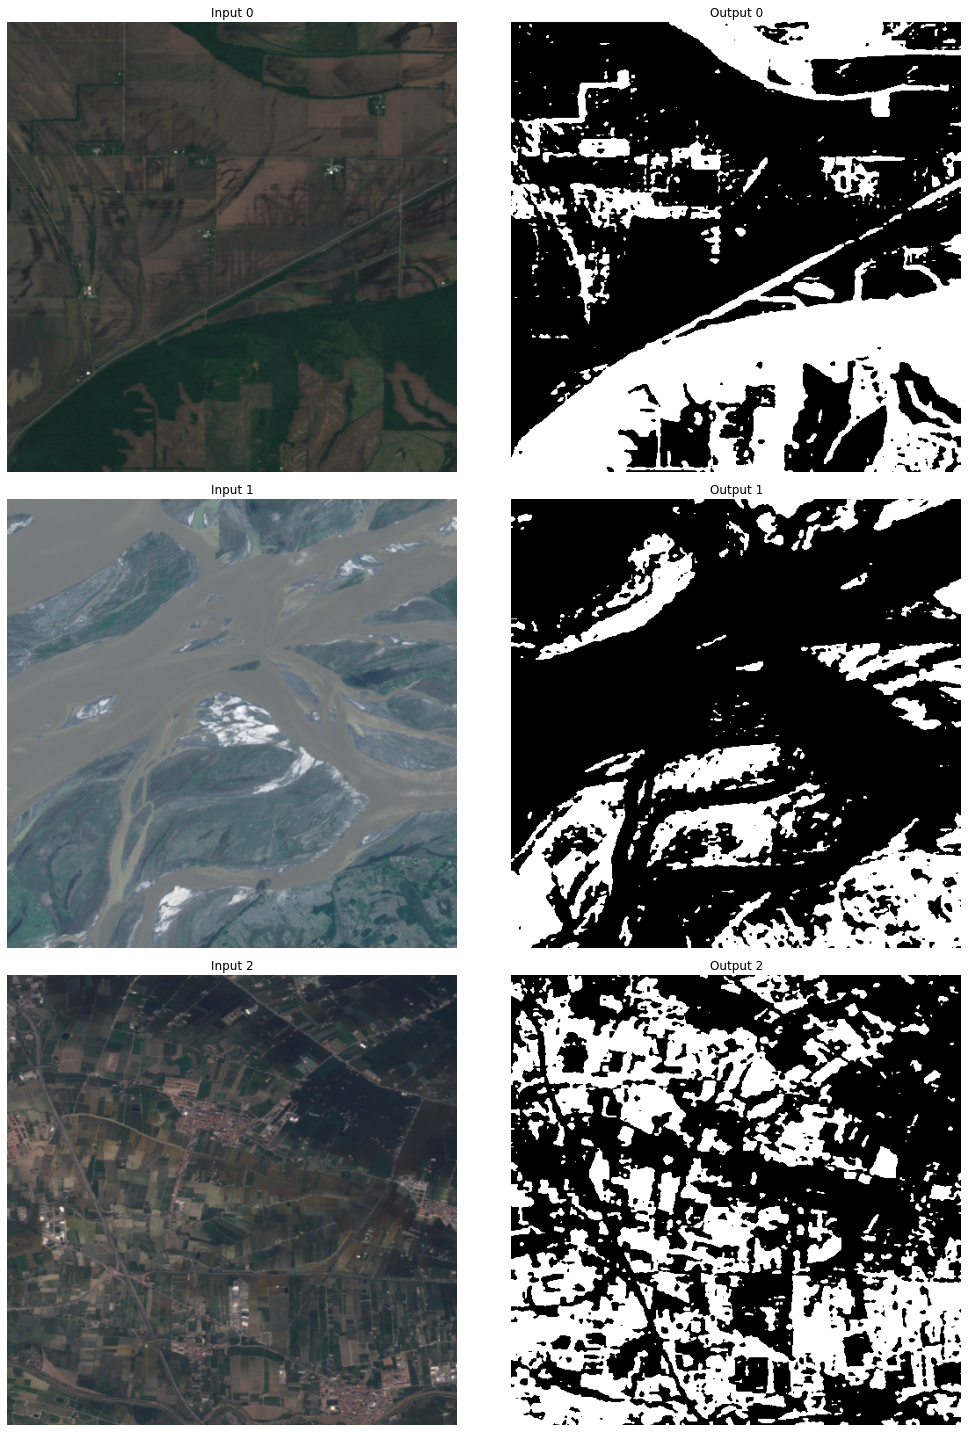

In [72]:
# Assuming you have lists input_lst and out_lst containing file paths
RED = 4  # Replace with the appropriate band index for the red channel
GREEN = 3  # Replace with the appropriate band index for the green channel
BLUE = 2  # Replace with the appropriate band index for the blue channel

built_origin_path = "flood/input/"
built_result_path = "built_out/"

input_lst = glob.glob(os.path.join(burn_origin_path,"*.tif"))
out_lst = glob.glob(os.path.join(burn_result_path,"*.tif"))

# Assuming you have lists input_lst and out_lst containing file paths
RED = 4  # Replace with the appropriate band index for the red channel
GREEN = 3  # Replace with the appropriate band index for the green channel
BLUE = 2  # Replace with the appropriate band index for the blue channel


# myorder = [1,2,3,0]
# out_lst = [out_lst[i] for i in myorder]

# src_in = img_preprocess(rasterio.open(input_lst[0]))
# plt.imshow(src_in)
# plt.show()

num_rows = len(input_lst)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for row in range(num_rows):
    idx = row 
    if idx < len(input_lst):
        src_in = img_preprocess(rasterio.open(input_lst[idx]))
        axs[row, 0].imshow(src_in)
        axs[row, 0].axis('off')
        axs[row, 0].set_title(f'Input {idx}')

        src_out = rasterio.open(out_lst[idx])
        axs[row, 1].imshow(src_out.read(1), cmap='gray')  # Assuming single-band output
        axs[row, 1].axis('off')
        axs[row, 1].set_title(f'Output {idx}')

plt.tight_layout()
plt.show()

In [74]:
# src_out = rasterio.open(out_lst[0])
# plt.imshow(src_out.read(1),cmap='gray')
# plt.show()

In [75]:
# file_path = input_lst[-1]
# file_path

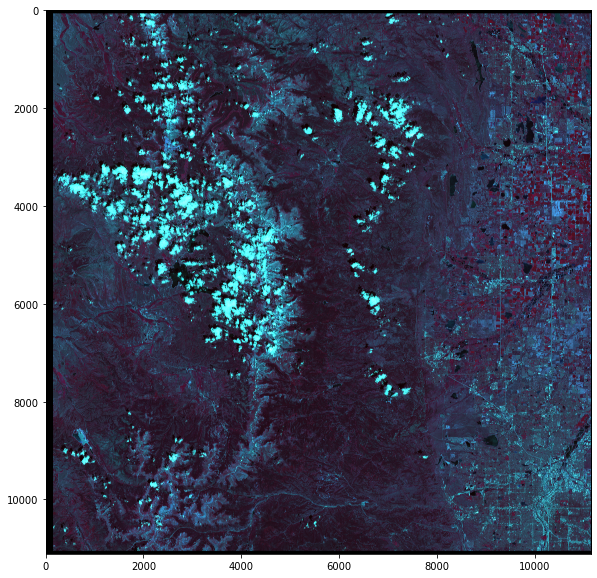

In [76]:
# built_origin_path = "built_out/"
# built_result_path = "built_out/"

input_lst = glob.glob(os.path.join(built_origin_path,"*.tif"))
out_lst = glob.glob(os.path.join(built_result_path,"*.tif"))

# Assuming you have lists input_lst and out_lst containing file paths
RED = 4  # Replace with the appropriate band index for the red channel
GREEN = 3  # Replace with the appropriate band index for the green channel
BLUE = 2  # Replace with the appropriate band index for the blue channel


# myorder = [1,2,3,0]
# out_lst = [out_lst[i] for i in myorder]

src_in = rasterio.open("new.tif", driver="GTiff")
src_in_img = img_preprocess(src_in)
plt.imshow(src_in_img)
plt.show()

In [77]:
output_file = "flood/input/boulder.tif"

In [78]:
# Coordinates for cropping
crop_top = 6000       # Y coordinate of the top-left corner
crop_left = 6000      # X coordinate of the top-left corner
crop_height = 512  # Height of the cropped area
crop_width = 512   # Width of the cropped area


# Create a figure and axis
cropped_data = src_in.read(window=((crop_top, crop_top + crop_height), (crop_left, crop_left + crop_width)))
# Create a new TIFF file for the cropped image
profile = src_in.profile  # Get the metadata from the source image
profile.update(width=crop_width, height=crop_height)  # Update width and height
with rasterio.open(output_file, 'w', **profile) as dst:
    # Write the cropped data to the new TIFF file
    dst.write(cropped_data)
# plt.show()

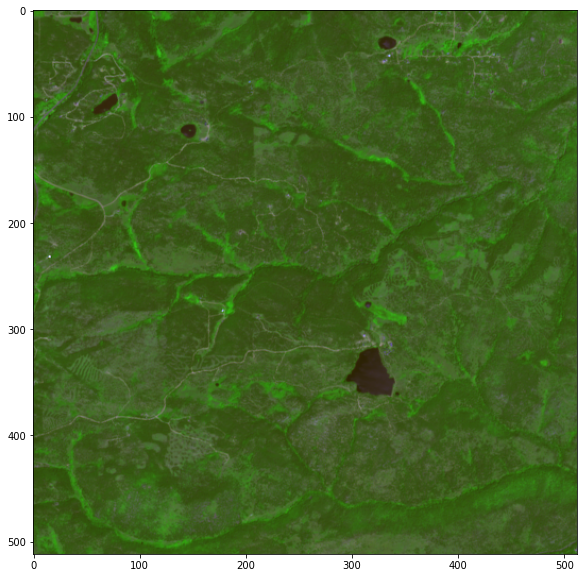

In [81]:
# Assuming you have lists input_lst and out_lst containing file paths
RED = 5  # Replace with the appropriate band index for the red channel
GREEN = 4  # Replace with the appropriate band index for the green channel
BLUE = 3  # Replace with the appropriate band index for the blue channel


# myorder = [1,2,3,0]
# out_lst = [out_lst[i] for i in myorder]

src_in = rasterio.open(output_file, driver="GTiff")
src_in_img = img_preprocess(src_in)
plt.imshow(src_in_img)
plt.show()

In [82]:
output_file_new = "flood/input/boulder_6.tif"

In [83]:
# Bands to keep (0-based index)
bands_to_keep = [2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 2]  # Select the first 6 bands

try:
    # Open the original TIFF file
    print(f"input file:{output_file}")
    print(f"output file:{output_file_new}")
    with rasterio.open(output_file) as src:
        # Read the selected bands
        data = src.read(bands_to_keep)

        # Update the metadata for the new image
        profile = src.profile
        profile.update(count=len(bands_to_keep))  # Update the band count

        # Create a new TIFF file for the reduced bands image
        with rasterio.open(output_file_new, 'w', **profile) as dst:
            # Write the reduced bands data to the new TIFF file
            dst.write(data)

    print("Reduced bands TIFF file created successfully.")

except Exception as e:
    print("Error:", e)

input file:flood/input/boulder.tif
output file:flood/input/boulder_6.tif
Reduced bands TIFF file created successfully.


In [84]:
boulder_6 = rasterio.open("flood/input/boulder_6.tif")
boulder_6

<open DatasetReader name='flood/input/boulder_6.tif' mode='r'>

In [85]:
boulder_6.shape

(512, 512)

In [86]:
boulder_6.indexes

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)

In [88]:
example = rasterio.open("flood/input/India_900498_S2Hand.tif")
example.shape

(512, 512)

In [89]:
example.indexes

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)